<a href="https://colab.research.google.com/github/benmccloskey/clustering/blob/main/Cancer_Data_Principle_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Principle Component Anaylsis**
Overview and code walkthrough

Dataset: Breast Cancer Dataset

Source: Most of the information is summarized from *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems*  by Aurélien Géron

Author: Benjamin McCloskey

# Overview
Principle Component Analysis (PCA) is an algorthm used for dimensionality reduction.

What is dimensionality reduction?

**Dimensionality Reductiion** - refers to techniques for reducing the number of input variables in training data. Usually it is a technique used for datasets containing a large amount of features (columns) and inputs (rows).

Beware
- DR will lead to information loss in a dataset

Why use it?

- Speed up training

- Data visualization

- Feature selection

- Noise reduction

*https://machinelearningmastery.com/dimensionality-reduction-for-machine-learning/#:~:text=Dimensionality%20reduction%20refers%20to%20techniques%20for%20reducing%20the%20number%20of,%E2%80%9Cessence%E2%80%9D%20of%20the%20data.

*https://learning.oreilly.com/library/view/hands-on-machine-learning/9781098125967/ch08.html

#Dimensionality: The Problem
We live in a 3d world and it's difficult for us to comprehend information in a higher dimension world.
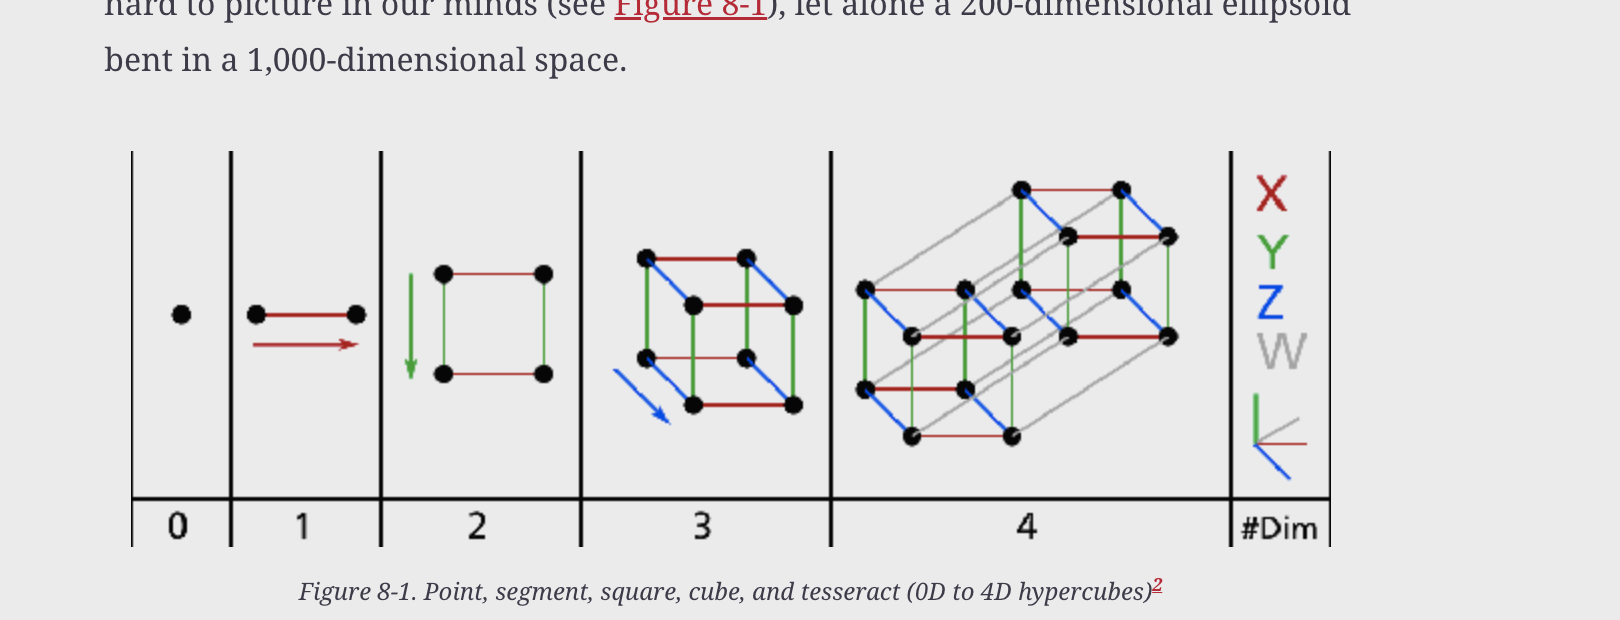

Image from Geron

Distance between different data points is influenced by the dimension for which said data is located in.



# Technical Definition

- PCA first will find a hyperplame that sits closest to the given data.
- The data is then project onto that hyperplane.

**Goal of PCA:** **To preserve Variance**

PCA chooses the hyperplane that will preserve the maximum variance within the given dataset.

Why variance?

- Preserves the maximum amount of information
- Minimizes the mean squared difference between the original dataset

## Principle Components
Each axis found by PCA is a principle component. PCA will first find one axis, and then find another axis *orthogonal* to that axis. This can be done for multiple components.

From the text:

*For each principal component, PCA finds a zero-centered unit vector pointing in the direction of the PC. Since two opposing unit vectors lie on the same axis, the direction of the unit vectors returned by PCA is not stable: if you perturb the training set slightly and run PCA again, the unit vectors may point in the opposite direction as the original vectors. However, they will generally still lie on the same axes. In some cases, a pair of unit vectors may even rotate or swap (if the variances along these two axes are very close), but the plane they define will generally remain the sam*

So, how do we find the PCs?
*Singular value decomposition (SVD)*

From text:
decompose the training set matrix X into the matrix multiplication of three matrices U Σ V⊺, where V contains the unit vectors that define all the principal components

It is important to understand eigenvectors and eignvalues for this concept. Basically, the matrix is decomposed and factored down, finding the theoretical values of said matrix

From the text:

*Once you have identified all the principal components, you can reduce the dimensionality of the dataset down to d dimensions by projecting it onto the hyperplane defined by the first d principal components. *



# Demo

# Setup

In [1]:
!pip install kaggle
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [5]:
#Retrieve your Kaggle username and key fro, kaggle.com under settings
os.environ['KAGGLE_USERNAME'] = 'benjaminmccloskey' #'<username>'
os.environ['KAGGLE_KEY'] = 'ebdd0aa9b815d9f9739df61d5cc560fc'#'<key>'


In [6]:
#download the dataset
!kaggle datasets download -d yasserh/breast-cancer-dataset

  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 54.0MB/s]


In [7]:
#Unzip dataset into colab environment
!unzip breast-cancer-dataset.zip

Archive:  breast-cancer-dataset.zip
  inflating: breast-cancer.csv       


In [8]:
df = pd.read_csv('/content/breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Exploratory Data Analysis (EDA)

In [9]:
#Check for Null Values
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
# Get the dimensions of the dataset (rows, columns)
print(df.shape)


# Get statistical summary of the dataset
print(df.describe())

# Check the data types of each column
print(df.dtypes)

(569, 32)
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.0

In [11]:
#PCA is unsupervised, therefore, remove the label column but save for later!
diagnosis = df.diagnosis

X = df.drop('diagnosis',axis=1)

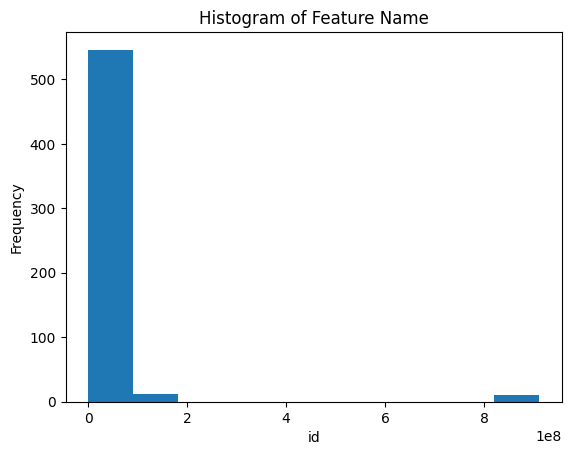

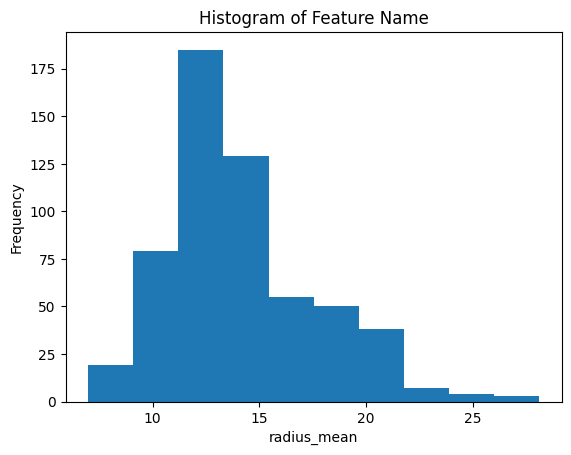

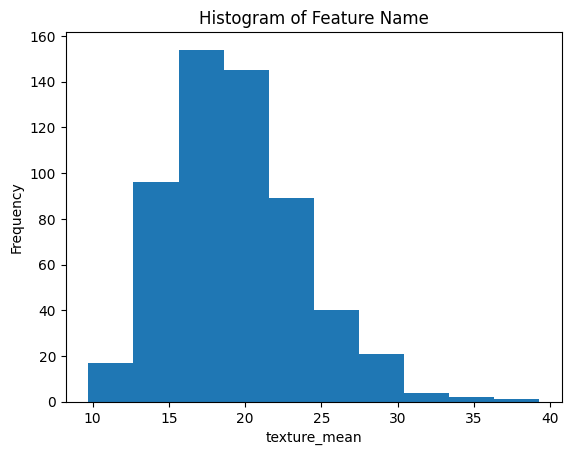

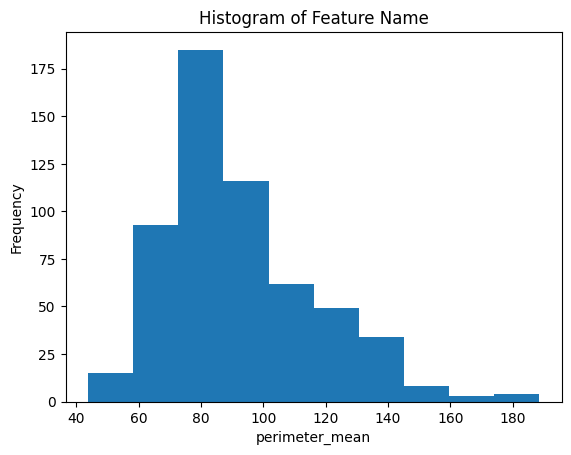

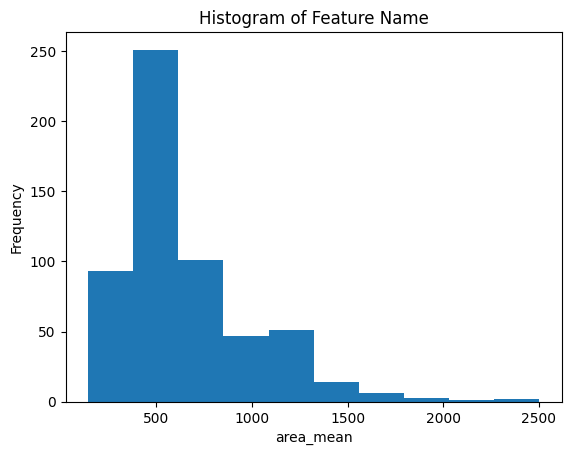

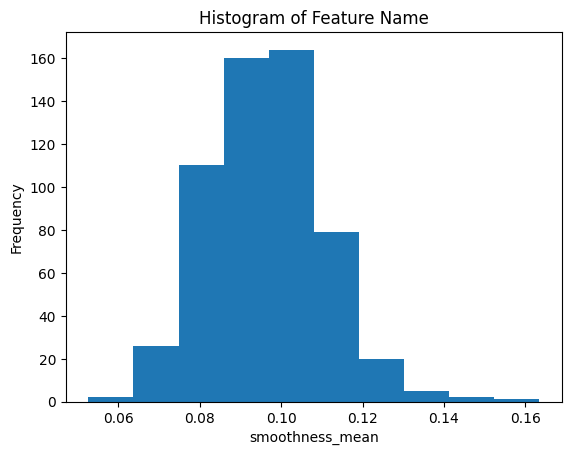

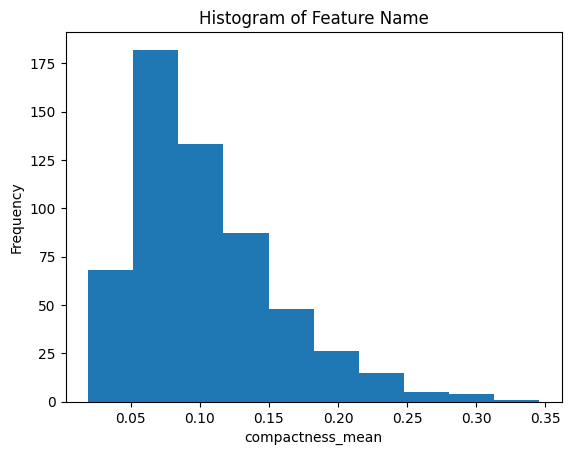

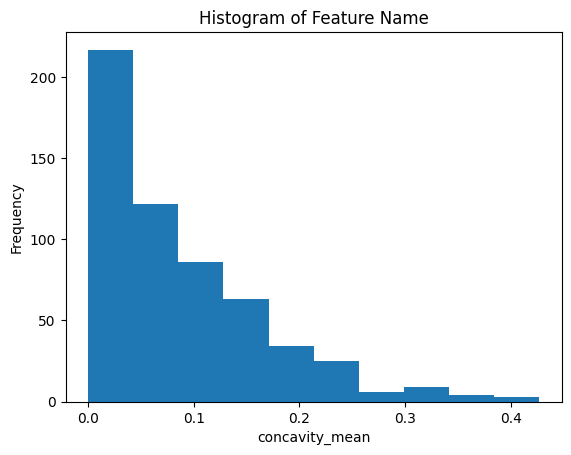

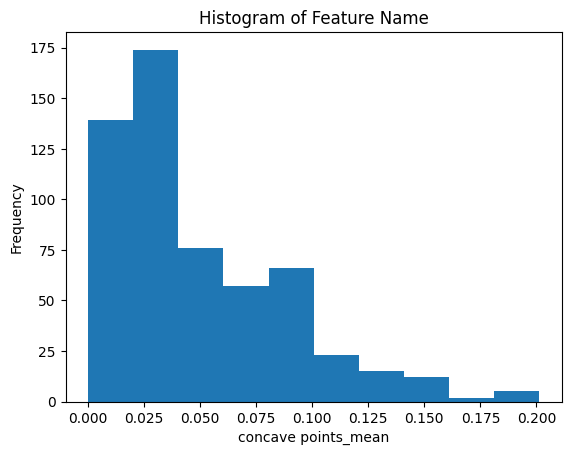

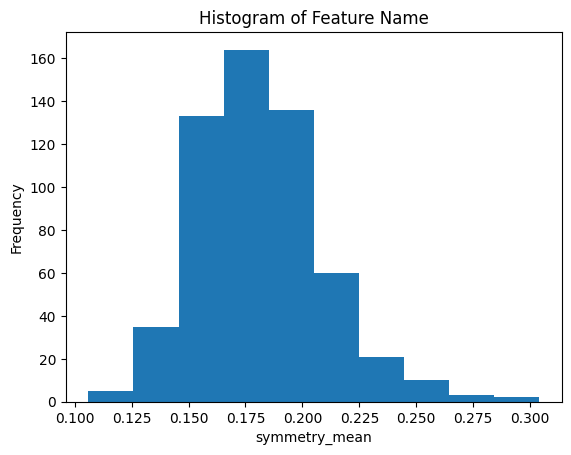

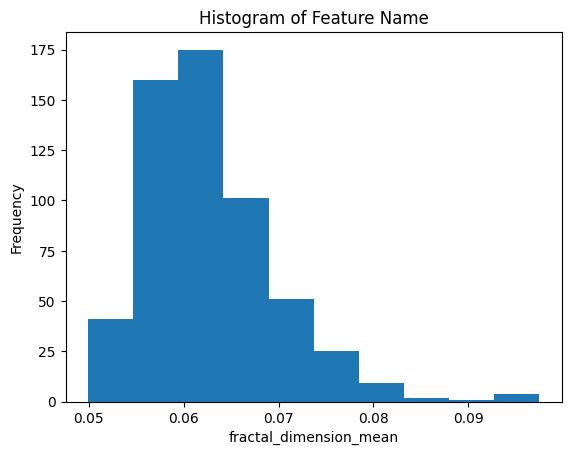

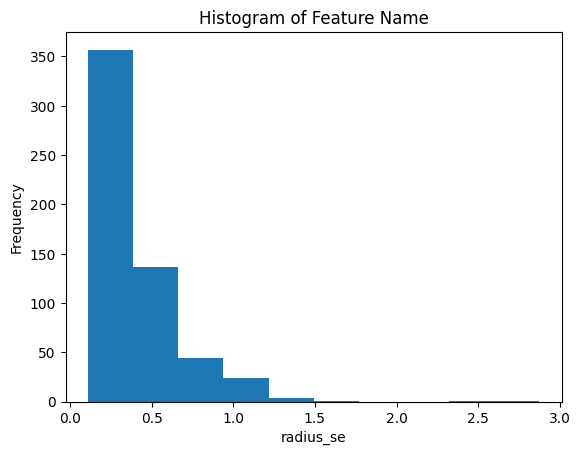

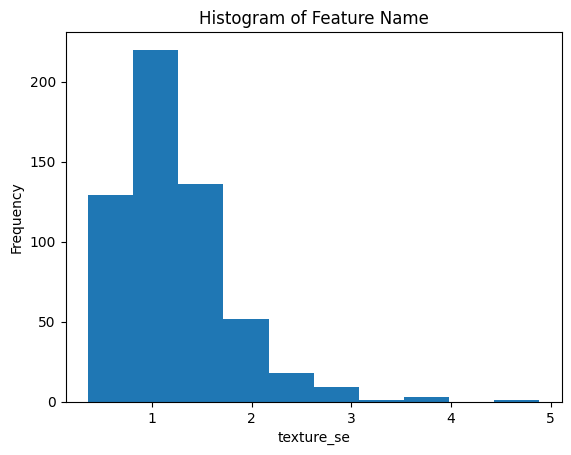

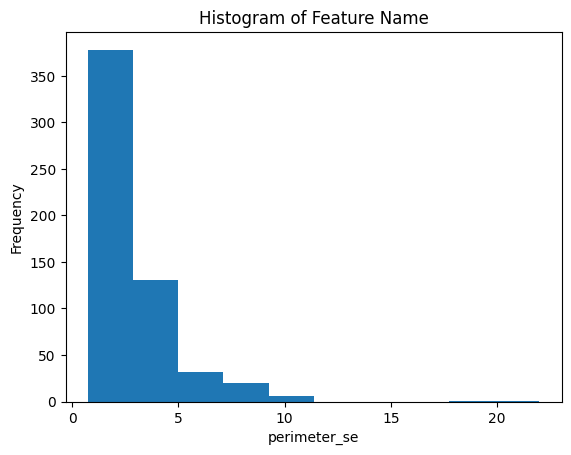

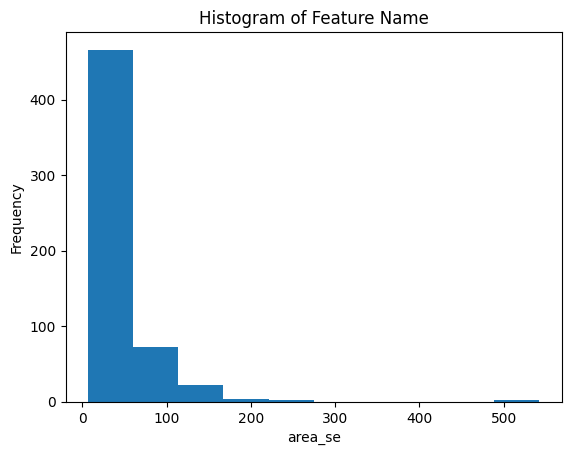

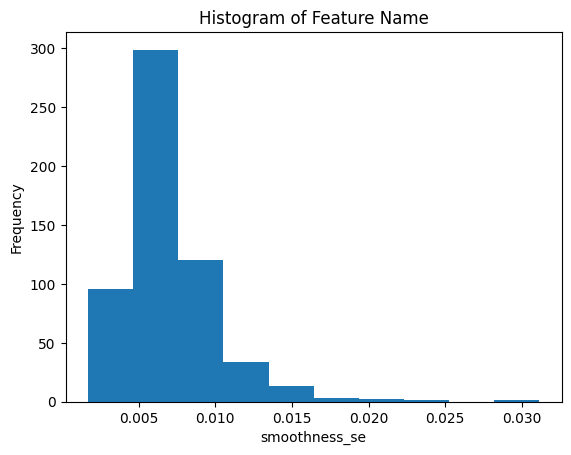

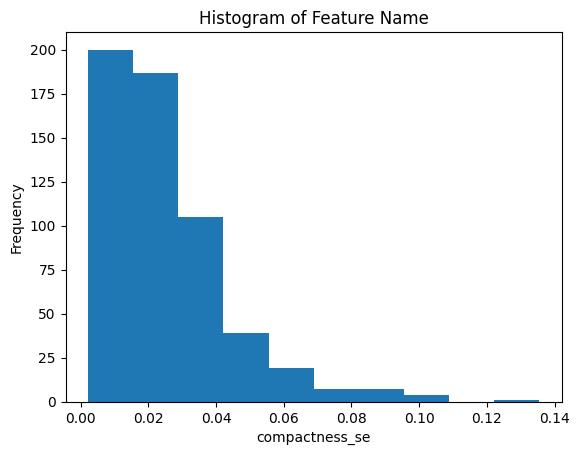

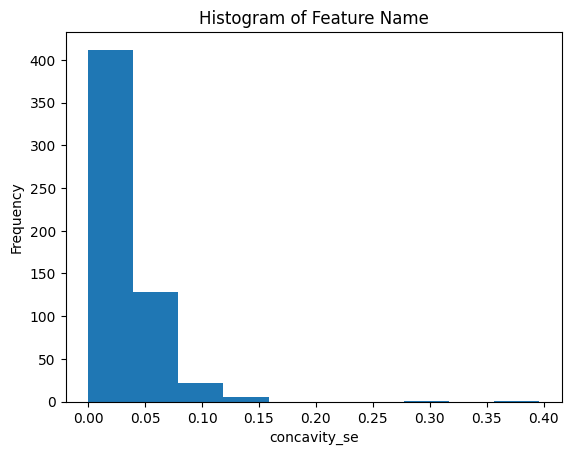

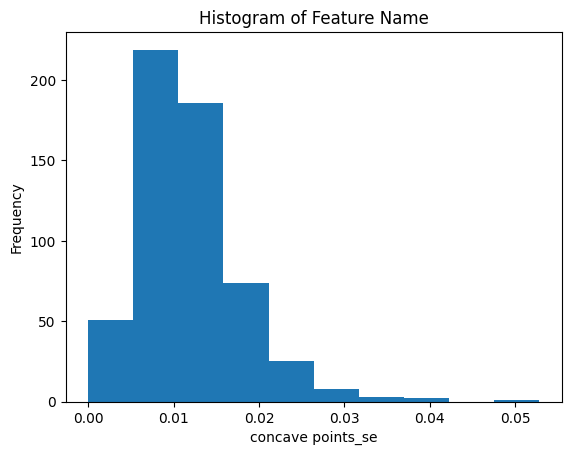

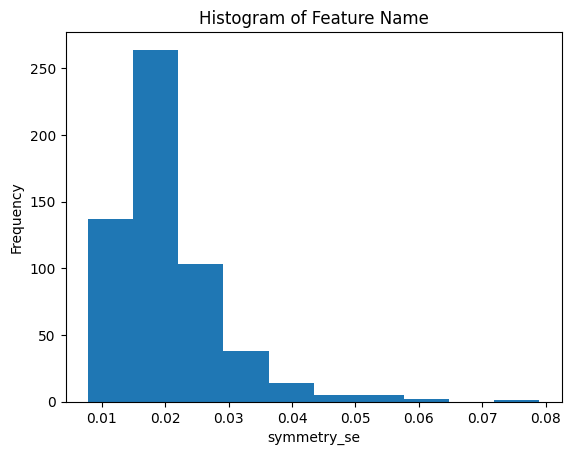

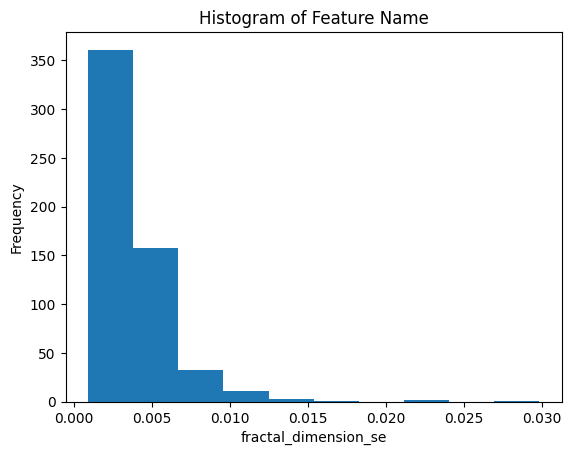

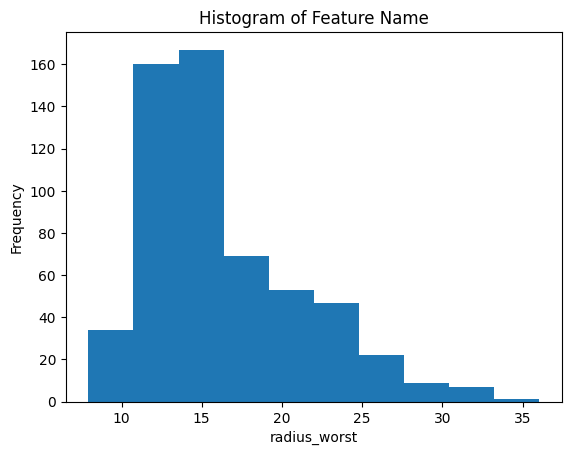

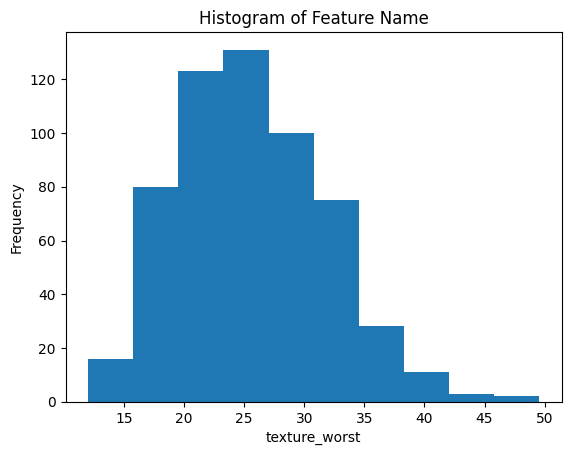

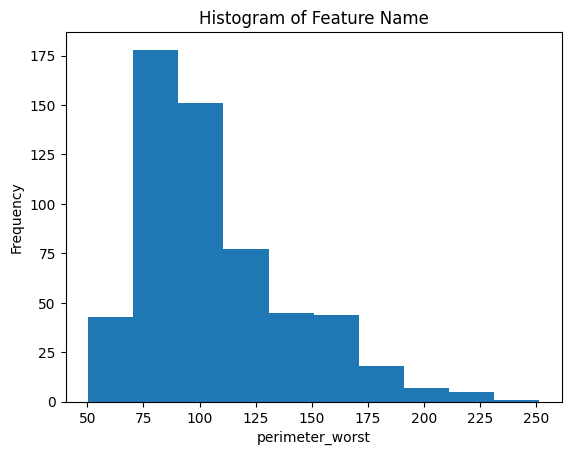

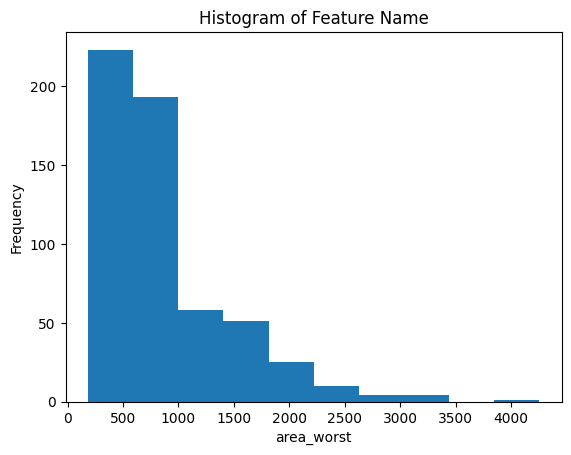

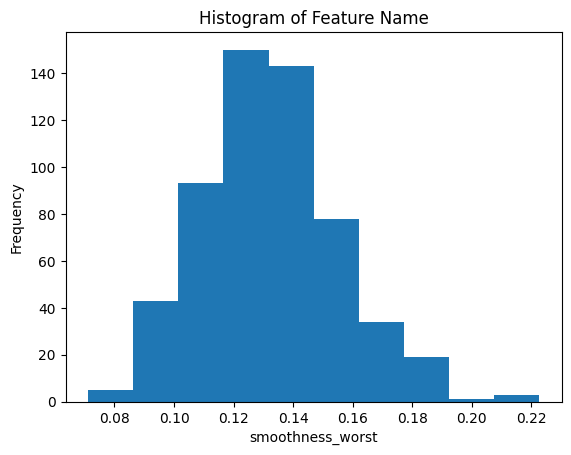

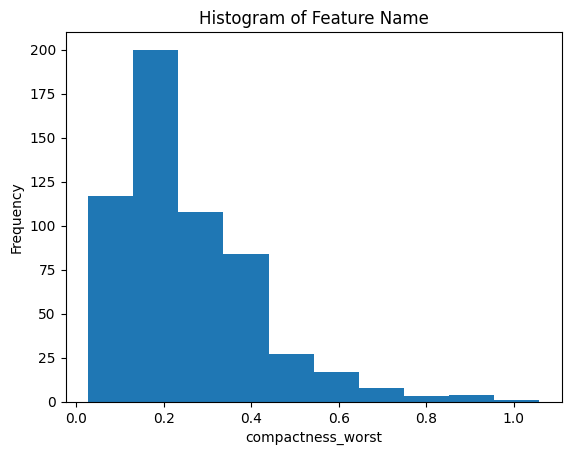

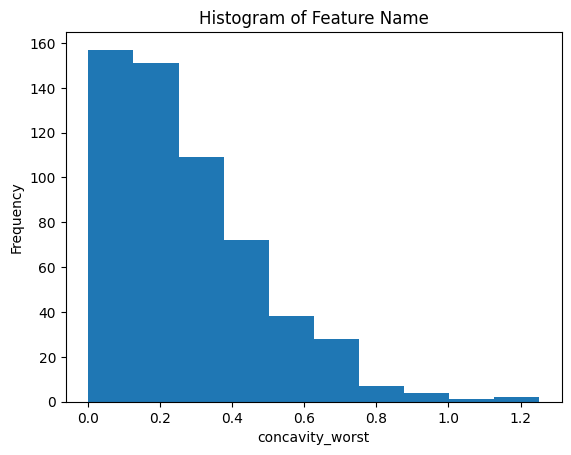

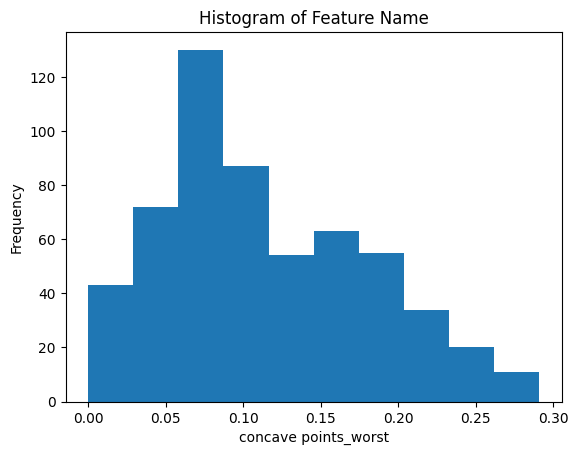

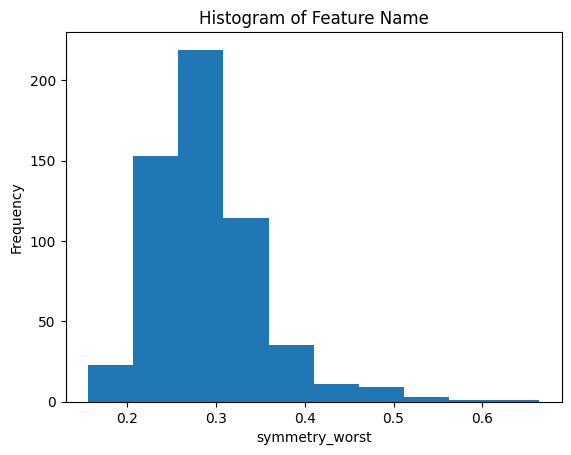

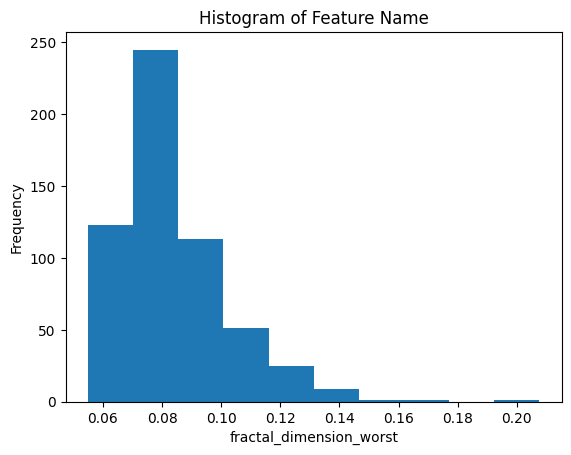

In [12]:
for col in X.columns:
  plt.hist(X[col])
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.title('Histogram of Feature Name')
  plt.show()

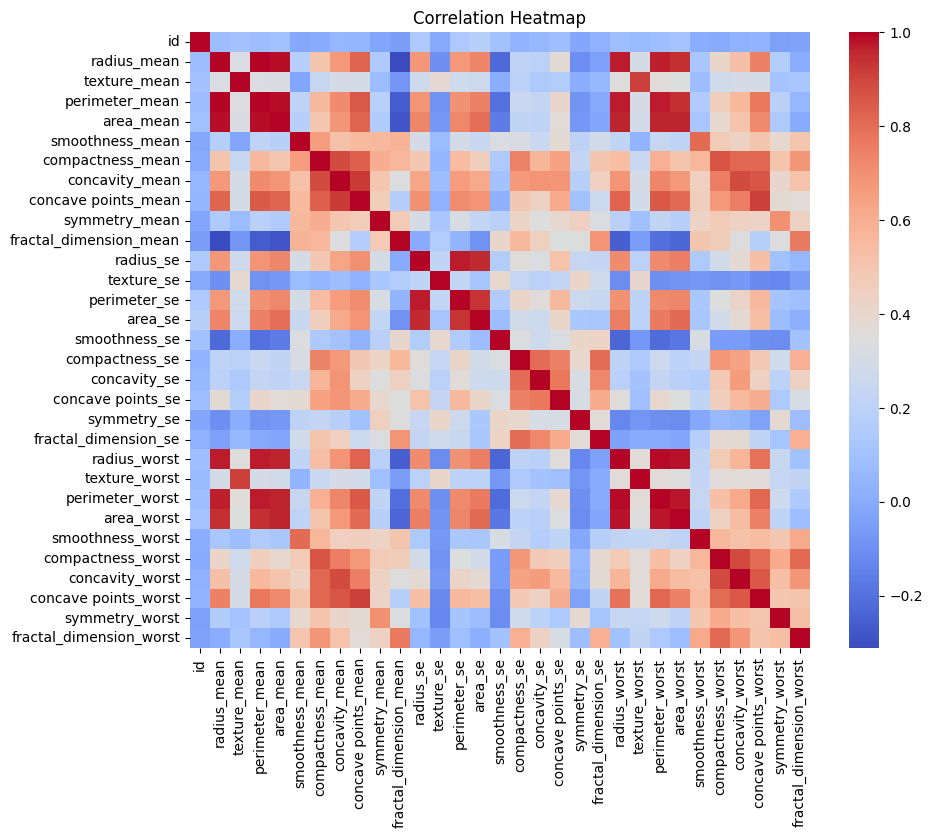

In [13]:
#Correlations
corr_mtx = X.corr()
plt.figure(figsize=(10, 8))  # Adjust the size of the heatmap as needed
sns.heatmap(corr_mtx, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [18]:
#scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA

In [ ]:
#Create a PCA object
pca = PCA() #Start with 2 components

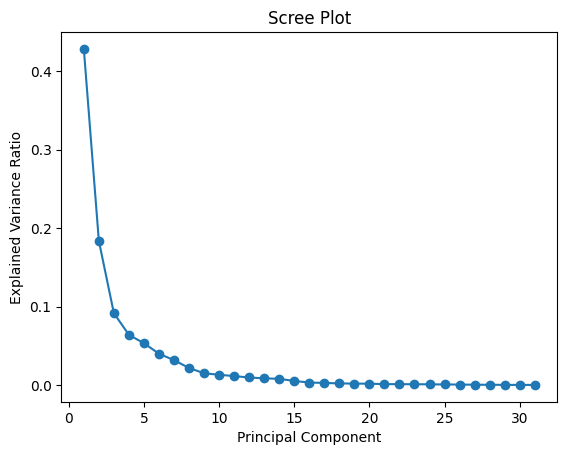

In [ ]:
pca.fit(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot the scree plot
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

In [ ]:
pca = PCA(n_components=4)
pca.fit(X_scaled)


In [ ]:
pca = PCA(n_components=4)
x4d = pca.fit_transform(X_scaled)

Text(0, 0.5, 'Second Principle Component')

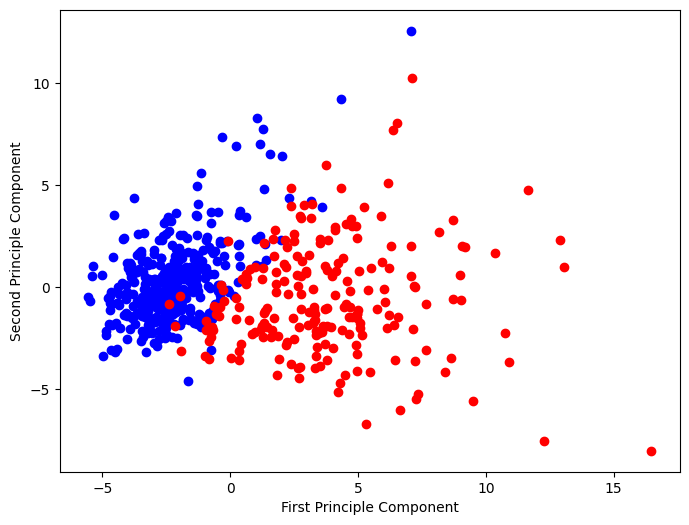

In [ ]:
color_map = {'M': 'red', 'B': 'blue'}


plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
for label in np.unique(diagnosis):
    indices = diagnosis == label
    plt.scatter(x4d[indices, 0], x4d[indices, 1], c=color_map[label], label=label)
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')